

---


**Importação das Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from re import X

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#conexao com os dados
df = pd.read_csv('/content/drive/MyDrive/DATA GIRLS/Estudo Inadimplência/credito.csv')

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




---
**Descrição dos Dados**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

**<h3>Dicionário de dados**

**sexo**: O gênero do cliente.

**dependentes**: Número de dependentes que o cliente possui.

**escolaridade**: Nível de escolaridade do cliente.

**estado_civil**: Estado civil do cliente.

**salario_anual**: Renda anual do cliente.

**tipo_cartao**: Tipo de cartão de crédito que o cliente possui.

**meses_de_relacionamento**: Quantidade de meses que o cliente tem um relacionamento com o banco.

**qtd_produtos**: Quantidade de produtos que o cliente tem com o banco.

**iteracoes_12m**: Quantidade de interações que o cliente teve com o banco nos últimos 12 meses.

**meses_inativo_12m**: Quantidade de meses que o cliente esteve inativo nos últimos 12 meses.

**limite_credito**: Limite de crédito do cliente.

**valor_transacoes_12m**: Valor total das transações que o cliente fez nos últimos 12 meses.

**qtd_transacoes_12m**: Quantidade total de transações que o cliente fez nos últimos 12 meses.



---


**Variáveis categóricas e numéricas**

In [ ]:
#valores das colunas e suas quantidades
for col in df.select_dtypes(include=['object']):
    print(f"Coluna: {col}")
    valores = df[col].value_counts()
    print(valores.head())
    print(f"-----------------------------------")

Coluna: sexo
sexo
F    5358
M    4769
Name: count, dtype: int64
-----------------------------------
Coluna: escolaridade
escolaridade
mestrado               3128
ensino medio           2013
na                     1519
sem educacao formal    1487
graduacao              1013
Name: count, dtype: int64
-----------------------------------
Coluna: estado_civil
estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64
-----------------------------------
Coluna: salario_anual
salario_anual
menos que $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
na                1112
Name: count, dtype: int64
-----------------------------------
Coluna: tipo_cartao
tipo_cartao
blue        9436
silver       555
gold         116
platinum      20
Name: count, dtype: int64
-----------------------------------
Coluna: limite_credito
limite_credito
1.438,21     11
34.516,98    10
34.516,45    10
1.438,72     10
1.438,31     10

In [ ]:
#medidas de tendencias calculadas de forma resumida
df.describe()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [ ]:
#conversao do valor de transações para tipos numericos
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '')
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace(',', '.')
df['valor_transacoes_12m'] = pd.to_numeric(df['valor_transacoes_12m'], errors='coerce')
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(float)

In [ ]:
#conversao do valor de transações para tipos numericos
df['limite_credito'] = df['limite_credito'].str.replace('.', '')
df['limite_credito'] = df['limite_credito'].str.replace(',', '.')
df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
df['limite_credito'] = df['limite_credito'].astype(float)



---

**Checagem/Tratamento de Dados**

In [ ]:
#checar se dataframe possui valores nulos ou inexistentes
df.isnull().sum()

,0
id,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,0
estado_civil,0
salario_anual,0
tipo_cartao,0
meses_de_relacionamento,0




---
**Data Visualization**


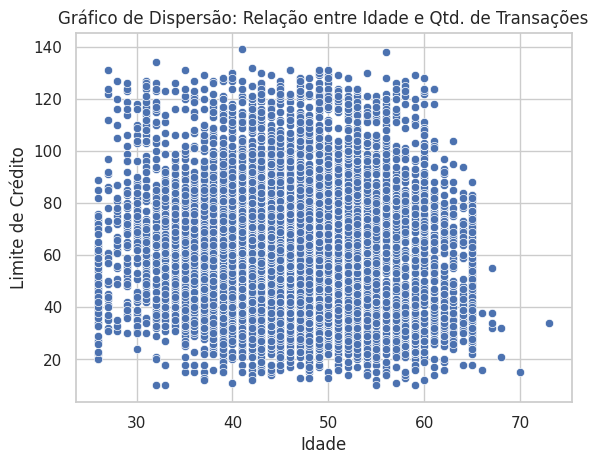

In [ ]:
sns.scatterplot(data=df, x='idade', y='qtd_transacoes_12m')
plt.title('Gráfico de Dispersão: Relação entre Idade e Qtd. de Transações')
plt.xlabel('Idade')
plt.ylabel('Limite de Crédito')
plt.grid(True)
plt.show()

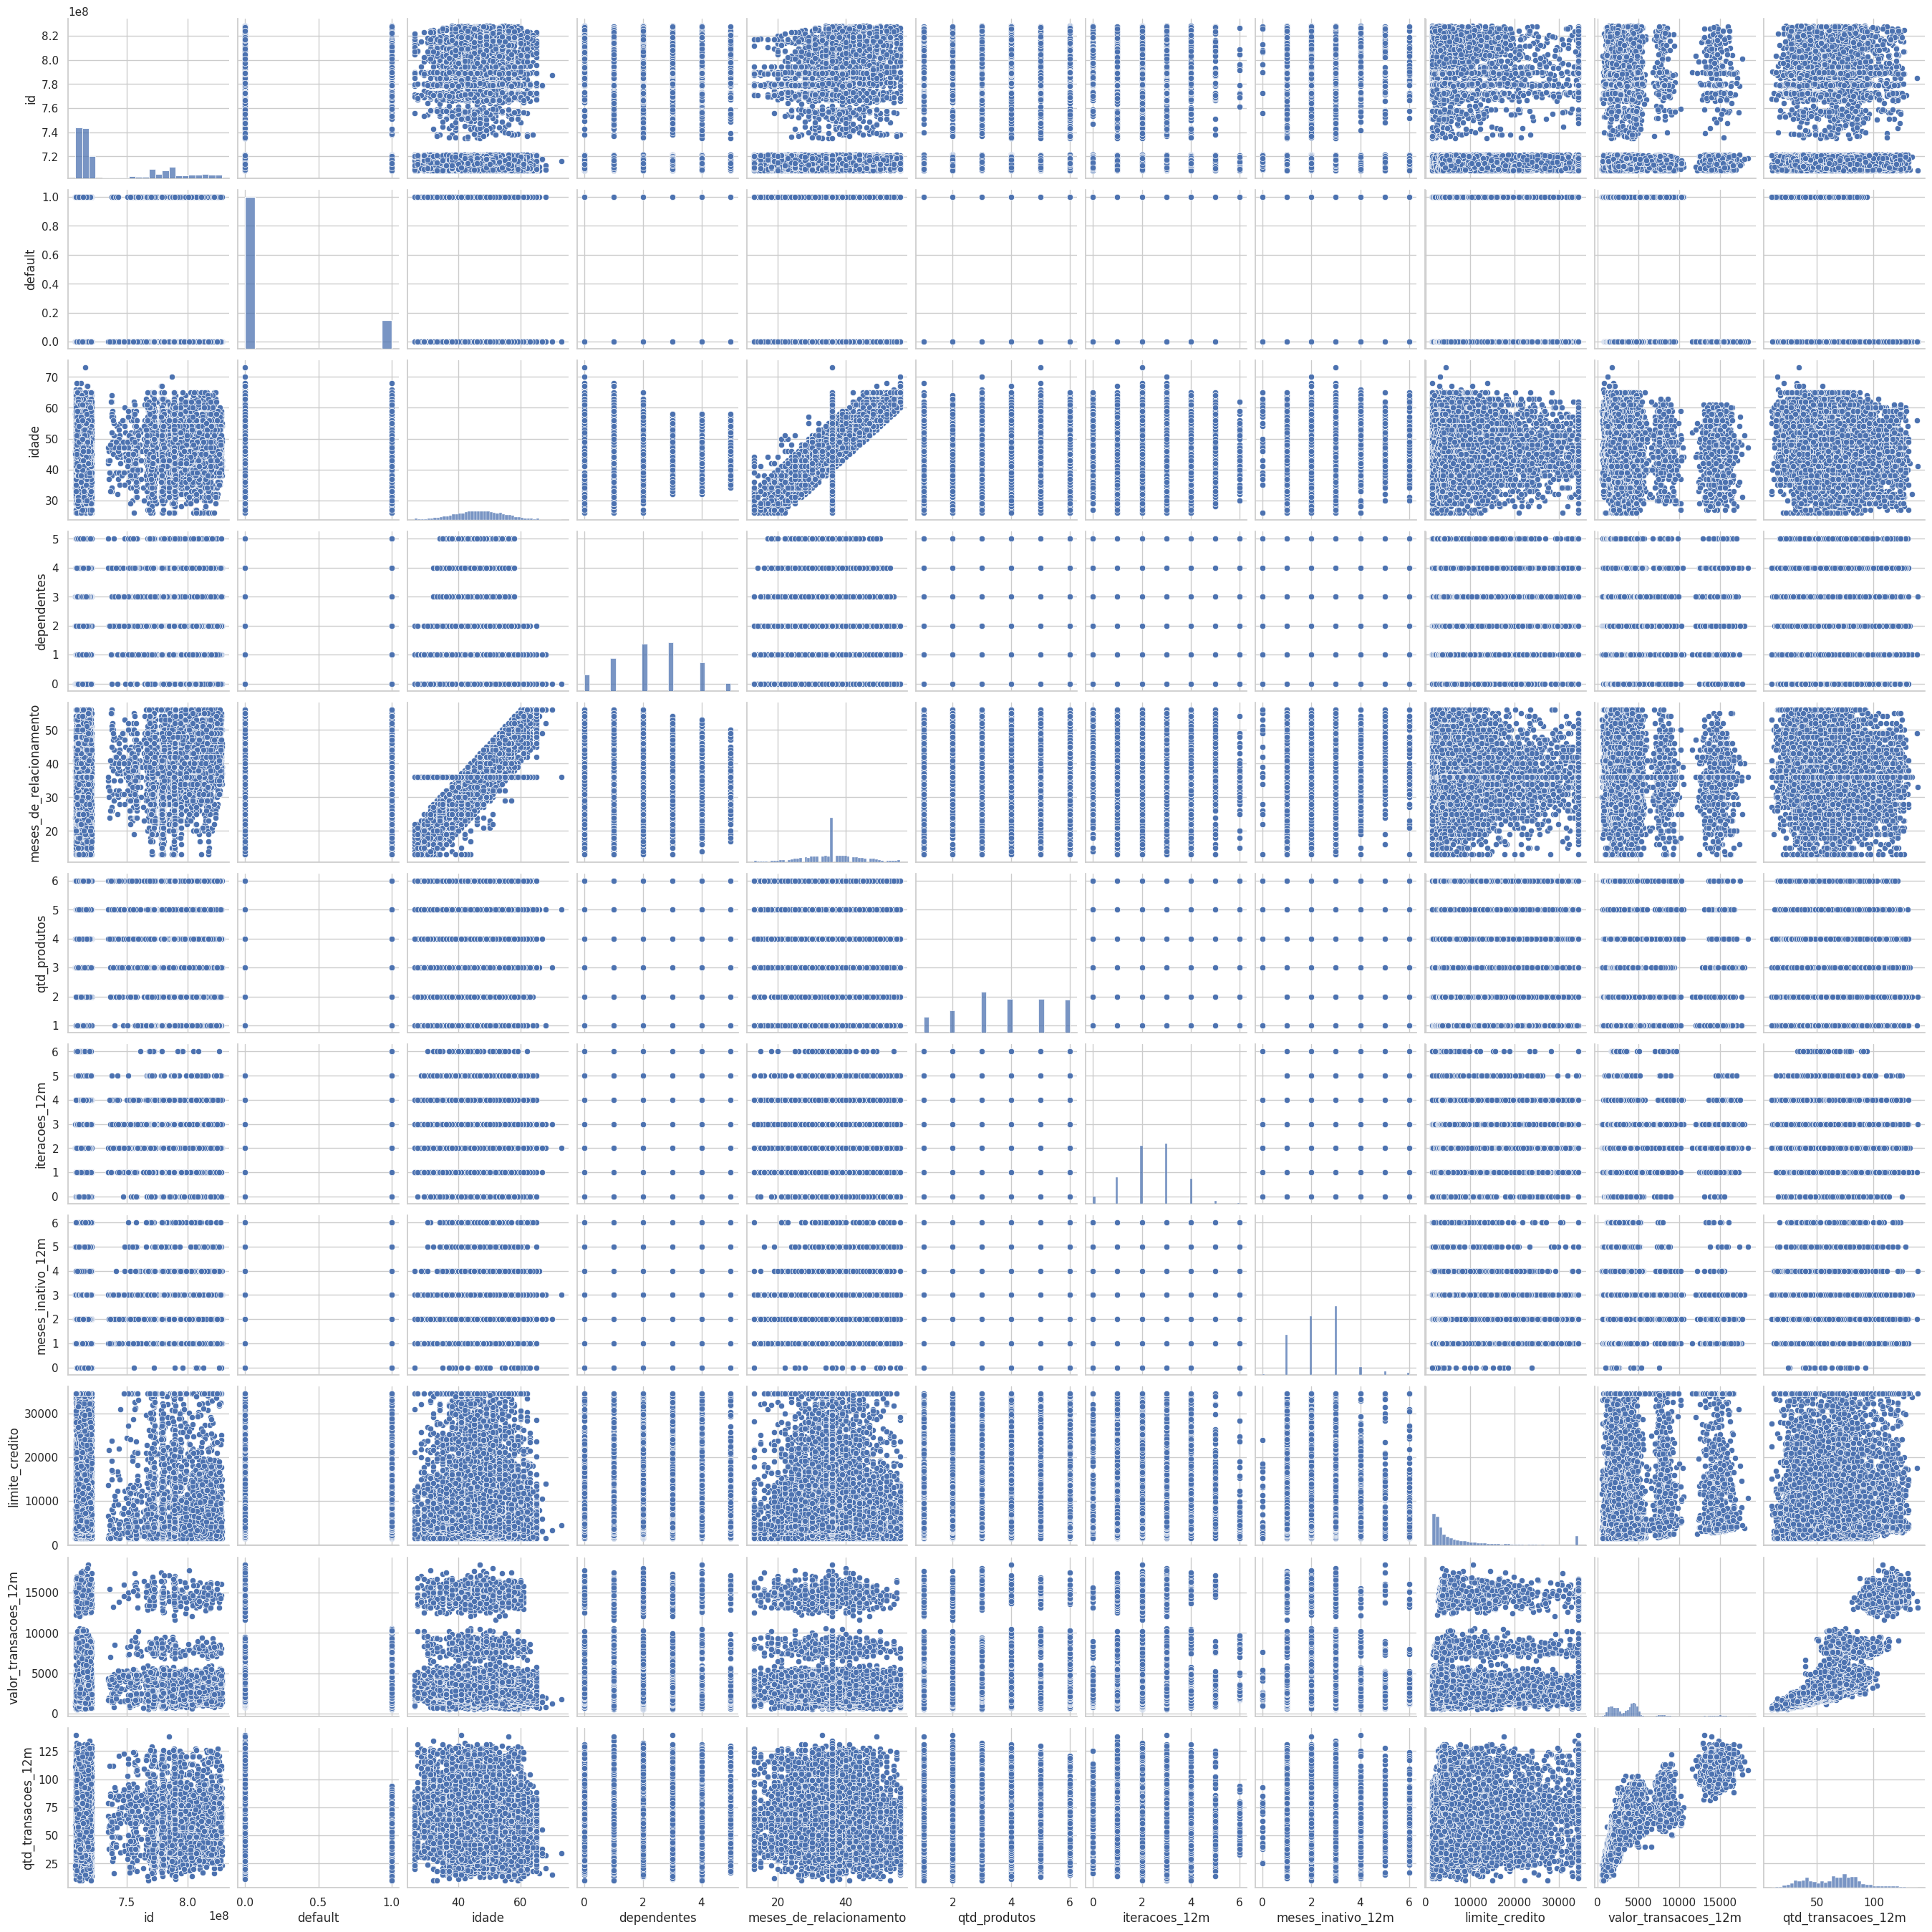

In [ ]:
#pairplot para visualizar scatterplots entre todas as variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64'])

sns.pairplot(variaveis_numericas)
plt.show()

<ipython-input-85-4c07affb3937>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", ax=ax)
<ipython-input-85-4c07affb3937>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", ax=ax)
<ipython-input-85-4c07affb3937>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", ax=ax)
<ipython-input-85-4c07affb3937>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

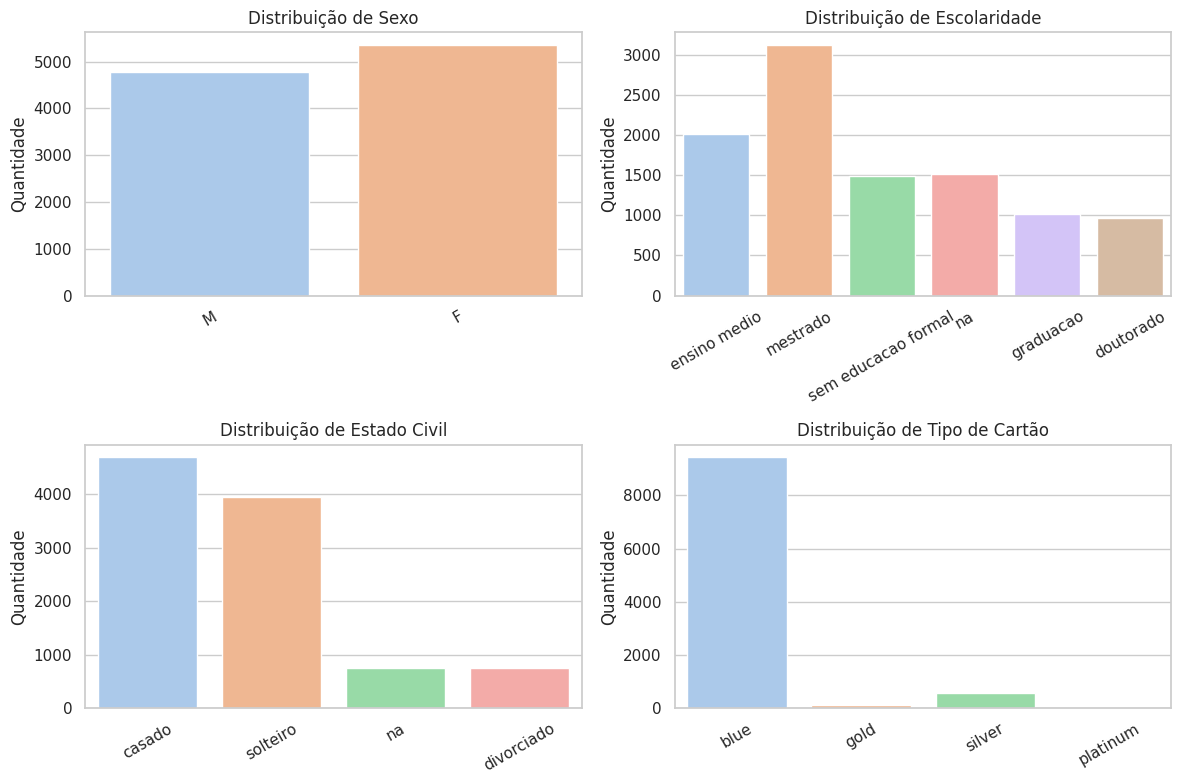

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

categorical_cols = ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao']
titles = ['Distribuição de Sexo', 'Distribuição de Escolaridade',
          'Distribuição de Estado Civil', 'Distribuição de Tipo de Cartão']

for ax, col, title in zip(axes.flatten(), categorical_cols, titles):
    sns.countplot(x=df[col], palette="pastel", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Quantidade")
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

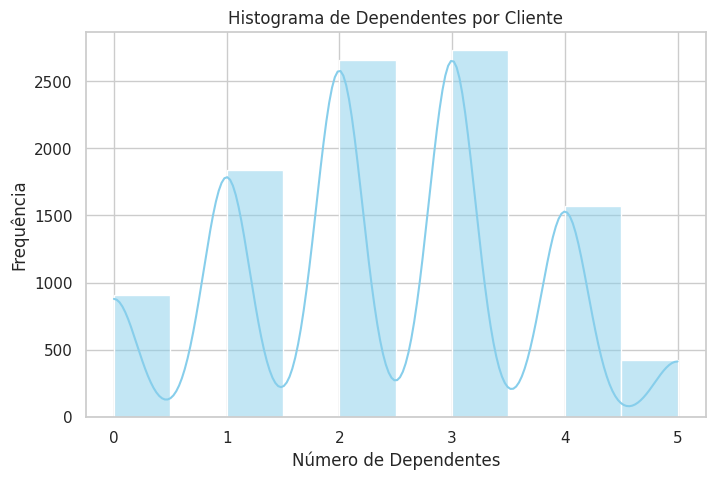

In [ ]:
# 2. Histograma da quantidade de dependentes por cliente
plt.figure(figsize=(8, 5))
sns.histplot(df['dependentes'], bins=10, kde=True, color="skyblue")
plt.title("Histograma de Dependentes por Cliente")
plt.xlabel("Número de Dependentes")
plt.ylabel("Frequência")
plt.show()

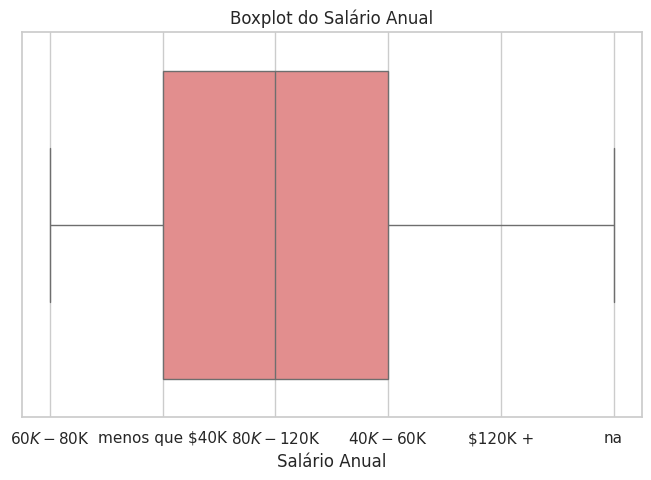

In [ ]:
# 3. Boxplot do salário anual para verificar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salario_anual'], color="lightcoral")
plt.title("Boxplot do Salário Anual")
plt.xlabel("Salário Anual")
plt.show()

Análises Comportamentais

<Axes: xlabel='limite_credito', ylabel='valor_transacoes_12m'>

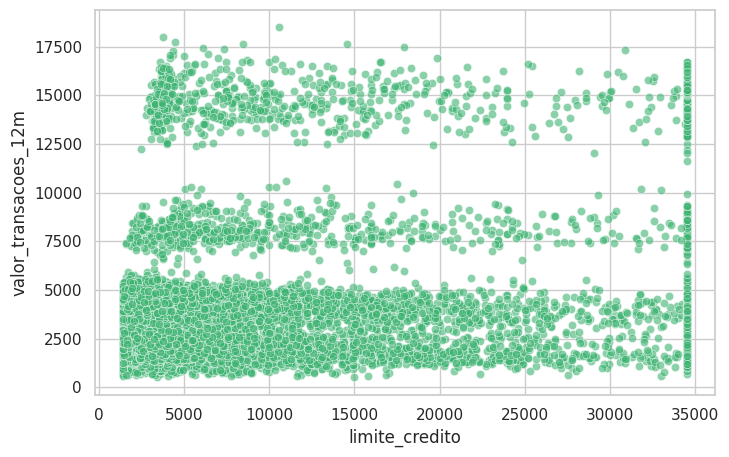

In [ ]:
#dispersao do limite de credito com o valor de transacoes
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['limite_credito'], y=df['valor_transacoes_12m'], alpha=0.6, color="mediumseagreen")

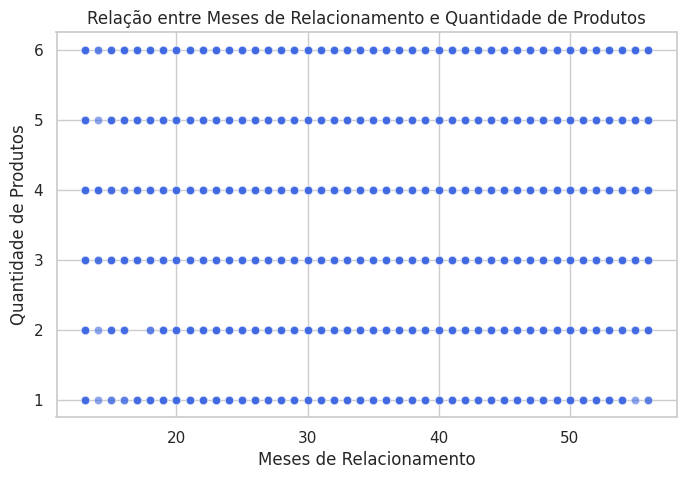

In [ ]:
#relação entre meses_de_relacionamento e qtd_produtos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["meses_de_relacionamento"], y=df["qtd_produtos"], alpha=0.6, color="royalblue")
plt.title("Relação entre Meses de Relacionamento e Quantidade de Produtos")
plt.xlabel("Meses de Relacionamento")
plt.ylabel("Quantidade de Produtos")
plt.show()

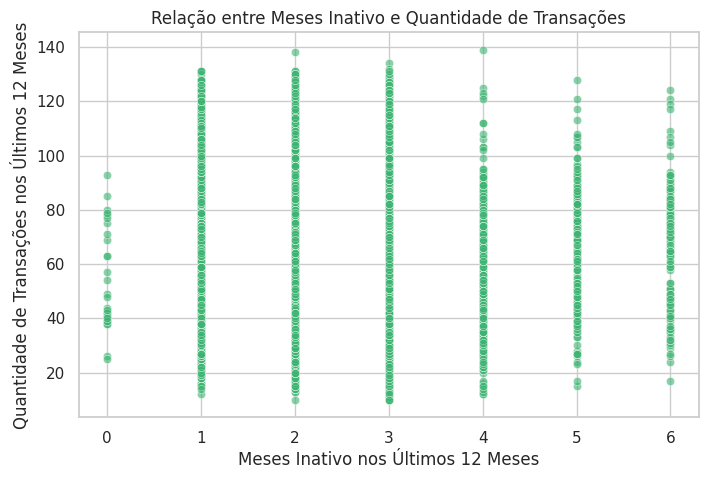

In [ ]:
#comparação entre meses_inativo_12m e qtd_transacoes_12m
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["meses_inativo_12m"], y=df["qtd_transacoes_12m"], alpha=0.6, color="mediumseagreen")
plt.title("Relação entre Meses Inativo e Quantidade de Transações")
plt.xlabel("Meses Inativo nos Últimos 12 Meses")
plt.ylabel("Quantidade de Transações nos Últimos 12 Meses")
plt.show()



---

**Análises Estatísticas**

O objetivo de muitas análises de dados da maioria das vezes é responder perguntas que podem ser geradas a partir de um grande volume de dados, para isso, será feita uma sepação por variáveis categóricas mais relevantes (isto é, as categorias financeiras) e em como suas métricas estão de comportando na amostra.

In [ ]:
#removendo o id das variaveis numericas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64'])
variaveis_numericas = variaveis_numericas.drop(columns=['id','default'])

In [ ]:
#média, moda e mediana para cada tipo de cartao a partir das variaveis numericas
for col in variaveis_numericas:
    print(f"Coluna: {col}")
    metrica = df.groupby('tipo_cartao')[col].agg(['mean', 'median', 'std'])
    print(metrica)
    print(f"-----------------------------------")

Coluna: idade
                  mean  median       std
tipo_cartao                             
blue         46.372404    46.0  8.070236
gold         45.439655    46.0  6.577020
platinum     47.500000    48.0  4.784844
silver       45.679279    45.0  7.422392
-----------------------------------
Coluna: dependentes
                 mean  median       std
tipo_cartao                            
blue         2.336477     2.0  1.295244
gold         2.672414     3.0  1.310664
platinum     2.450000     3.0  1.145931
silver       2.439640     3.0  1.353381
-----------------------------------
Coluna: meses_de_relacionamento
                  mean  median       std
tipo_cartao                             
blue         35.960682    36.0  8.032436
gold         35.525862    36.0  6.618106
platinum     36.250000    36.0  5.901605
silver       35.452252    36.0  7.512142
-----------------------------------
Coluna: qtd_produtos
                 mean  median       std
tipo_cartao                      

In [ ]:
#média, moda e mediana para cada salario anual a partir das variaveis numericas
for col in variaveis_numericas:
    print(f"Coluna: {col}")
    metrica = df.groupby('salario_anual')[col].agg(['mean', 'median', 'std'])
    print(metrica)
    print(f"-----------------------------------")

Coluna: idade
                     mean  median       std
salario_anual                              
$120K +         47.603851    49.0  6.769921
$40K - $60K     46.087151    46.0  8.434617
$60K - $80K     45.968616    46.0  7.520167
$80K - $120K    46.428013    47.0  6.857736
menos que $40K  46.297950    46.0  8.446741
na              46.274281    46.0  8.663285
-----------------------------------
Coluna: dependentes
                    mean  median       std
salario_anual                             
$120K +         2.462173     2.0  1.166987
$40K - $60K     2.308380     2.0  1.316315
$60K - $80K     2.440086     2.0  1.290571
$80K - $120K    2.492508     3.0  1.210467
menos que $40K  2.263690     2.0  1.337593
na              2.275180     2.0  1.327476
-----------------------------------
Coluna: meses_de_relacionamento
                     mean  median       std
salario_anual                              
$120K +         36.891334    36.0  7.358623
$40K - $60K     35.873184    36.0 

In [ ]:
#média, moda e mediana para cada salario anual a partir das variaveis numericas
for col in variaveis_numericas:
    print(f"Coluna: {col}")
    metrica = df.groupby('salario_anual')[col].agg(['mean', 'median', 'std'])
    print(metrica)
    print(f"-----------------------------------")

Coluna: idade
                     mean  median       std
salario_anual                              
$120K +         47.603851    49.0  6.769921
$40K - $60K     46.087151    46.0  8.434617
$60K - $80K     45.968616    46.0  7.520167
$80K - $120K    46.428013    47.0  6.857736
menos que $40K  46.297950    46.0  8.446741
na              46.274281    46.0  8.663285
-----------------------------------
Coluna: dependentes
                    mean  median       std
salario_anual                             
$120K +         2.462173     2.0  1.166987
$40K - $60K     2.308380     2.0  1.316315
$60K - $80K     2.440086     2.0  1.290571
$80K - $120K    2.492508     3.0  1.210467
menos que $40K  2.263690     2.0  1.337593
na              2.275180     2.0  1.327476
-----------------------------------
Coluna: meses_de_relacionamento
                     mean  median       std
salario_anual                              
$120K +         36.891334    36.0  7.358623
$40K - $60K     35.873184    36.0 

In [ ]:
#média, moda e mediana para cada limite de credito a partir das variaveis numericas
for col in variaveis_numericas:
    print(f"Coluna: {col}")
    metrica = df.groupby('limite_credito')[col].agg(['mean', 'median', 'std'])
    print(metrica)
    print(f"-----------------------------------")

Coluna: idade
                     mean  median        std
limite_credito                              
1438.00         53.000000    53.0        NaN
1438.01         42.500000    42.5   8.962886
1438.02         45.400000    42.0   8.561542
1438.03         48.666667    49.0  10.092902
1438.04         55.333333    56.0   4.041452
...                   ...     ...        ...
34516.95        43.500000    41.0   9.746794
34516.96        45.750000    45.5   5.675763
34516.97        50.500000    52.5   8.103497
34516.98        45.500000    46.5   5.720334
34516.99        46.600000    46.0  10.358571

[9272 rows x 3 columns]
-----------------------------------
Coluna: dependentes
                    mean  median       std
limite_credito                            
1438.00         5.000000     5.0       NaN
1438.01         2.750000     3.0  1.500000
1438.02         2.400000     3.0  1.516575
1438.03         1.833333     2.0  1.602082
1438.04         1.333333     2.0  1.154701
...                



---

**Estudo de Correlação**

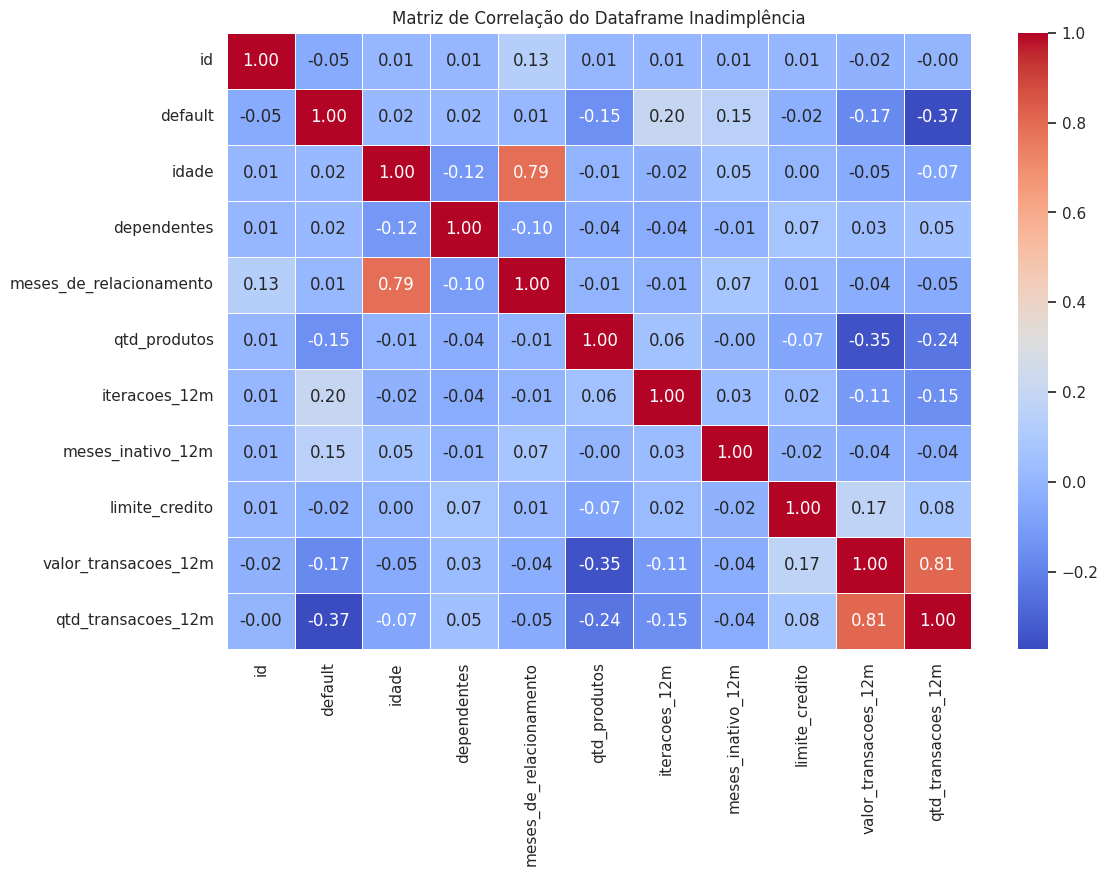

In [ ]:
variaveis_numericas = df.select_dtypes(include=['int64', 'float64'])
correlacao = variaveis_numericas.corr()

#plot da matriz
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Matriz de Correlação do Dataframe Inadimplência')
plt.show()

In [ ]:
#máscara para remover a diagonal (correlação de uma variável consigo mesma)
mask = np.triu(np.ones_like(correlacao, dtype=bool))

#aplicar máscara à matriz de correlação
correlacao_mascara = correlacao.mask(mask)

#retornar o índice do valor absoluto máximo de correlação
max_corr = correlacao_mascara.unstack().abs().idxmax()
print(f"As duas variáveis mais correlacionadas são: {max_corr[0]} e {max_corr[1]}")
print(f"Valor da correlação: {correlacao.loc[max_corr[0], max_corr[1]]:.4f}")

As duas variáveis mais correlacionadas são: valor_transacoes_12m e qtd_transacoes_12m
Valor da correlação: 0.8072
